# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [42]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [43]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [44]:
estimators = [('k_means_3', KMeans(n_clusters=3)), ('k_means_5', KMeans(n_clusters=5)), ('k_means_7', KMeans(n_clusters=7, n_init=3))]

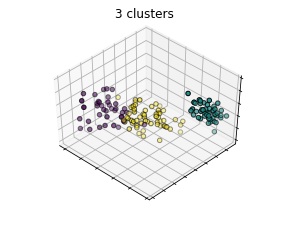

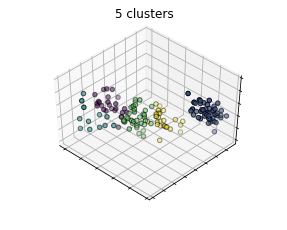

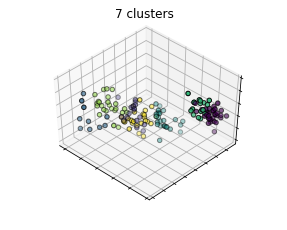

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fignum = 1
titles = ['3 clusters', '5 clusters', '7 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 1
                                  ], c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum += 1

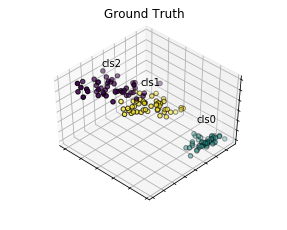

In [46]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([]) # 刪除刻度
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12